<a href="https://colab.research.google.com/github/Batman511/Numerical_methods_7sem/blob/main/2)%20%D0%98%D1%82%D0%B5%D1%80%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9%20%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%20%D0%97%D0%B5%D0%B9%D0%B4%D0%B5%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%A1%D0%9B%D0%90%D0%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# матрица коэффициентов А и ответов b
A = np.array([[10,2,-2],
              [7,8,5],
              [3,4,8]])
b = np.array([1,2,3])

# Итерационный метод Зейделя для решения СЛАУ

In [ ]:
def Seidel(A,b,precision = 1e-5):
  X = np.zeros(A.shape[0])
  X_new = X.copy()
  n = A.shape[0]
  iter=0

  exit = False
  while not exit:
      for i in range(n):
          SUM1 = 0
          SUM2 = 0

          for j in range(i):
            SUM1 += A[i][j]*X_new[j]
          for j in range(i + 1, n):
            SUM2 += A[i][j]*X[j]

          X_new[i] = (b[i] - SUM1 - SUM2)/A[i][i]

      iter+=1
      exit = max(abs(X-X_new)) <= precision
      X = X_new.copy()
  
  return iter, X

seidel = Seidel(A, b, 1e-8)
print(f"Iteratios: {seidel[0]}")
print(f"X: {seidel[1]}")      

Iteratios: 20
X: [ 0.21142857 -0.17428571  0.38285714]


Невязка и число обусловленности

In [ ]:
# невязка
def discrep(A,b,ans):
  return b - np.matmul(A, ans.T)

# число обусловленности       np.linalg.cond(A)  
def obu(A):
  print("Число обусловленности: ",np.linalg.norm(A)*np.linalg.norm(np.linalg.inv(A)))

In [ ]:
print('Невязка r:\n',discrep(A,b,seidel[1]))
obu(A)

Невязка r:
 [ 1.58775928e-08 -7.93879629e-09  0.00000000e+00]
Число обусловленности:  7.736905989199706


# Генерация рандомной положительно определенной симметричной матрицы

маленькая обусловленность

In [ ]:
def create_matrix(row = 20):  
  r = np.round(np.random.rand(row*(row+1)//2),3)*10
  matrix = np.zeros((row,row))

  for i in range(row):
    t = i*(i+1)//2
    matrix[i,0:i+1] = r[t:t+i+1]
    matrix[0:i,i] = r[t:t+i]
    matrix[i,i]+=row*2    # row*(row-1)

  matrix_A = (matrix.transpose()+matrix)/2 
  return matrix

def create_b(row = 20):
  b = (np.round(np.random.rand(1, row), 2)*10)[0]
  return b

b = create_b(50)
matrix_A = create_matrix(50)

Рандомная матрица с разной обусловленностью

In [ ]:
import sklearn.datasets as sk
row = 50
b = (np.round(np.random.rand(1, row), 2)*10)[0]
matrix_A = np.array(sk.make_spd_matrix(n_dim=row))*10

# Применение метода и графики

In [ ]:
seidel = Seidel(matrix_A, b, 1e-5)
print(f"Iteratios: {seidel[0]}")
print(f"X: {seidel[1]}")  

Iteratios: 11
X: [ 0.03836897  0.02445295  0.03584088  0.00522725  0.01845724  0.00125296
  0.03969341  0.00727125 -0.0212209   0.03066805  0.03227226 -0.01272534
  0.05220433  0.02147596  0.04518591  0.01764375 -0.01149394 -0.00203356
 -0.01387677  0.05788097  0.01812611 -0.02347891  0.02954431  0.00870708
  0.01269518 -0.01977909  0.00969036  0.04588883  0.05981605  0.03678065
  0.01739251  0.01192824  0.03341136 -0.01570098 -0.03622634 -0.01832614
 -0.03138017  0.01672873  0.04647992  0.04513715 -0.01784464 -0.01613523
  0.0073735  -0.01673175  0.02521798  0.0438892  -0.02449383  0.05248002
  0.06210115 -0.03290129]


In [ ]:
answer = np.linalg.solve(matrix_A, b)
print("Макс ошибка:           ",max(abs(seidel[1] - answer)))

print('\nМакс невязка:          ',max(abs(discrep(matrix_A,b,seidel[1]))),"\n")

obu(A)

Макс ошибка:            5.046384312687446e-06

Макс невязка:           0.0004922817712307292 

Число обусловленности:  7.736905989199706


Зафисимость числа итераций от точности

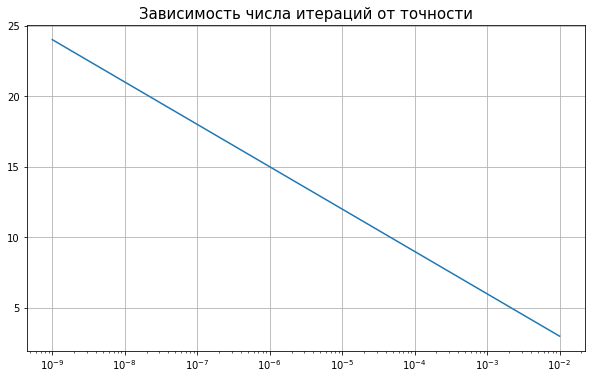

In [ ]:
row = 50
axis_x = [1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9] 
iter_y = []

for eps in axis_x:
  iter_y.append( Seidel(matrix_test,b_test,eps)[0] )
 

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()
ax.set_title("Зависимость числа итераций от точности", fontsize=15)
ax.plot( axis_x, iter_y)
plt.grid(True)
plt.xscale('log')